In [ ]:
#import helper func
import sys
import os
sys.path.append(os.path.abspath("../")) 
from src.utils.utils import *


In [22]:
# reading the csv
df = load_data('../data/benin-malanville.csv')
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [25]:
# Summary statistics
df.describe()

df = clean_data(df,['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust'])

# Summary
summary, missing = generate_summary(df)
display(summary)
display(missing)

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,240.340468,167.187516,108.768126,236.524528,228.737160,28.179683,54.487969,2.071892,2.743631,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
std,330.865639,261.710501,150.385064,326.815176,316.357415,5.924297,28.073069,1.506107,1.898486,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,1.800000,-0.100000,0.500000,4.500000,4.300000,28.000000,55.100000,1.900000,2.400000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,482.900000,314.200000,207.700000,463.600000,447.600000,32.300000,80.100000,3.000000,3.900000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,1232.000000,952.300000,569.600000,1215.000000,1177.000000,43.800000,100.000000,6.600000,8.400000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN


,missing_count,missing_percent
Comments,525600,100.0


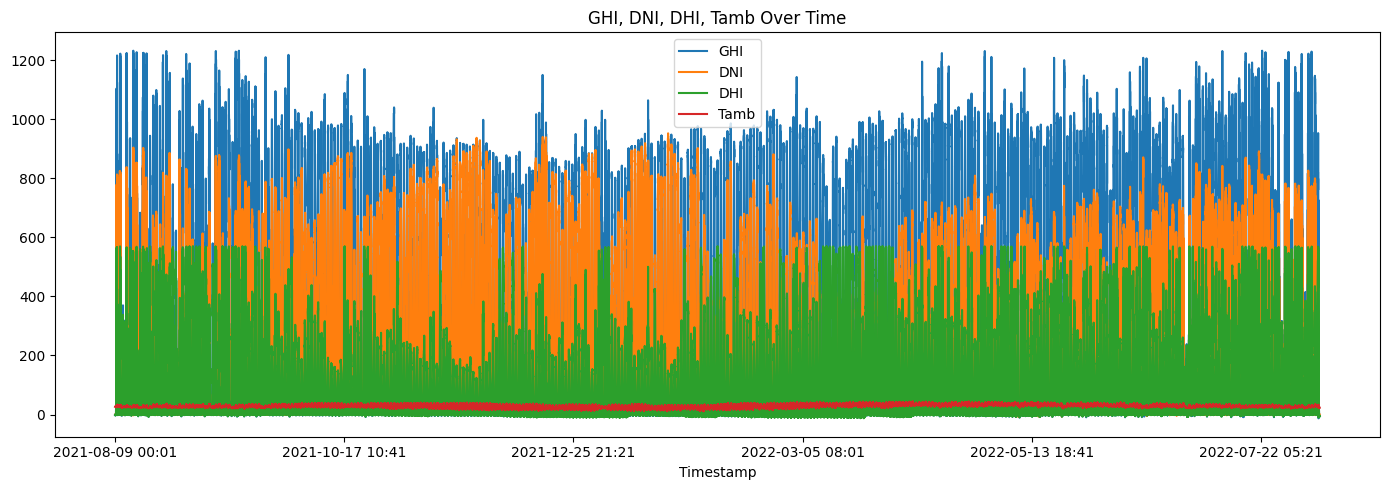

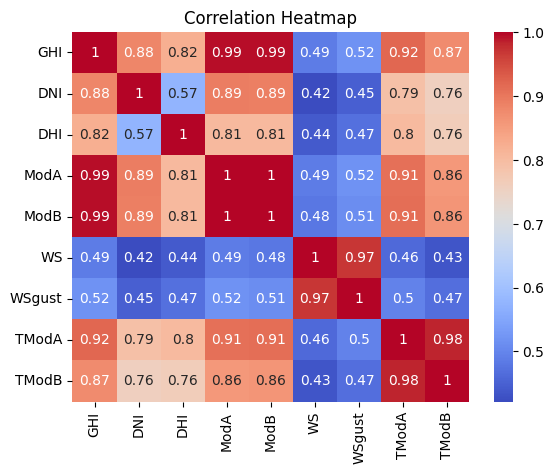

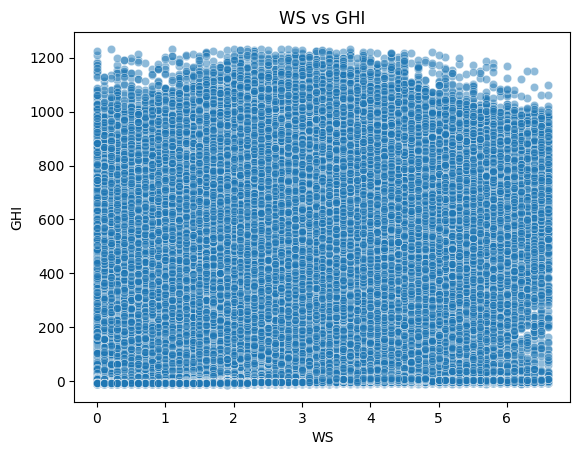

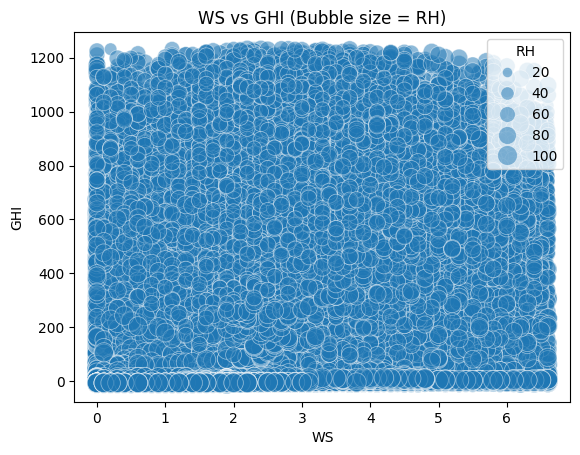

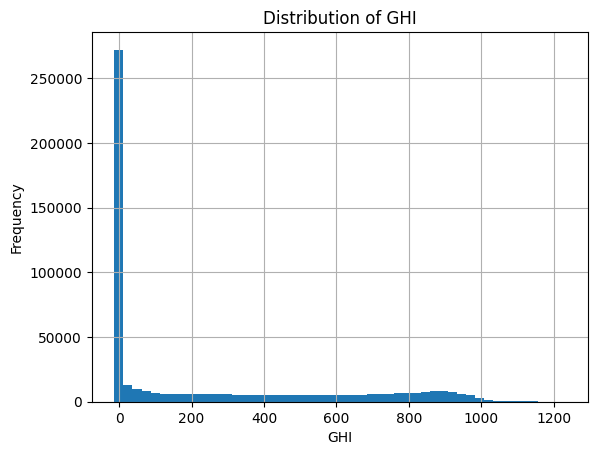

In [27]:
# Visualizations
key_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
timestamp_col = "Timestamp"
plot_time_series(df, time_col=timestamp_col, value_columns=['GHI', 'DNI', 'DHI', 'Tamb'])
plot_correlations(df, columns=key_columns + ['TModA', 'TModB'])
plot_scatter(df, x='WS', y='GHI', bubble_size_col='RH')
plot_histogram(df, column='GHI')